In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from xgboost import XGBRegressor



In [3]:

df = pd.read_csv(r"C:\Users\mohan\Downloads\archive (2)\digital_wallet_ltv_dataset.csv")
df.head(), df.shape

(  Customer_ID  Age  Location Income_Level  Total_Transactions  \
 0   cust_0000   54     Urban          Low                 192   
 1   cust_0001   67  Suburban         High                 979   
 2   cust_0002   44     Urban         High                 329   
 3   cust_0003   30     Rural         High                  71   
 4   cust_0004   58     Urban       Middle                 878   
 
    Avg_Transaction_Value  Max_Transaction_Value  Min_Transaction_Value  \
 0           16736.384023           60216.834510            6525.814861   
 1           14536.734683           48350.100272            2186.742245   
 2            7061.372800           32521.157187            2743.406808   
 3           16426.876453           17827.896720            4360.784994   
 4           10800.092660           17497.634534            4532.872520   
 
     Total_Spent  Active_Days  Last_Transaction_Days_Ago  \
 0  3.213386e+06          140                        209   
 1  1.423146e+07          229 

In [4]:
df = df.drop("Customer_ID", axis = 1)
df.head(1)

,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
0,54,Urban,Low,192,16736.384023,60216.83451,6525.814861,3.213386e+06,140,209,2114,25,2224.01214,Monthly,Debit Card,3,61.56859,1,327954.567175


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7000 non-null   int64  
 1   Location                     7000 non-null   object 
 2   Income_Level                 7000 non-null   object 
 3   Total_Transactions           7000 non-null   int64  
 4   Avg_Transaction_Value        7000 non-null   float64
 5   Max_Transaction_Value        7000 non-null   float64
 6   Min_Transaction_Value        7000 non-null   float64
 7   Total_Spent                  7000 non-null   float64
 8   Active_Days                  7000 non-null   int64  
 9   Last_Transaction_Days_Ago    7000 non-null   int64  
 10  Loyalty_Points_Earned        7000 non-null   int64  
 11  Referral_Count               7000 non-null   int64  
 12  Cashback_Received            7000 non-null   float64
 13  App_Usage_Frequenc

In [6]:
features = df.iloc[:, :19]
features

,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
0,54,Urban,Low,192,16736.384023,60216.834510,6525.814861,3.213386e+06,140,209,2114,25,2224.012140,Monthly,Debit Card,3,61.568590,1,3.279546e+05
1,67,Suburban,High,979,14536.734683,48350.100272,2186.742245,1.423146e+07,229,240,2960,20,4026.823518,Monthly,UPI,17,60.392889,8,1.437053e+06
2,44,Urban,High,329,7061.372800,32521.157187,2743.406808,2.323192e+06,73,21,3170,0,1441.011395,Monthly,Debit Card,11,45.305579,4,2.419387e+05
3,30,Rural,High,71,16426.876453,17827.896720,4360.784994,1.166308e+06,299,285,4756,35,4365.855580,Weekly,Wallet Balance,6,22.030191,1,1.284599e+05
4,58,Urban,Middle,878,10800.092660,17497.634534,4532.872520,9.482481e+06,236,329,1992,18,4161.523827,Daily,UPI,18,20.634723,5,9.569514e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,68,Suburban,High,340,162.703503,605.997495,80.352666,5.531919e+04,78,20,521,32,654.218655,Monthly,Credit Card,14,3.351374,3,1.244681e+04
6996,62,Suburban,High,647,1575.707877,4702.522747,359.511332,1.019483e+06,271,252,2972,40,3574.857418,Monthly,Wallet Balance,13,19.735330,3,1.131049e+05
6997,16,Urban,Middle,481,14429.355178,17207.737631,1510.598329,6.940520e+06,225,348,2423,8,2899.068571,Monthly,UPI,12,45.036932,2,7.002484e+05
6998,32,Urban,High,574,8005.027184,33203.795716,1976.326124,4.594886e+06,121,50,634,31,2432.363200,Monthly,Credit Card,11,44.145749,1,4.636404e+05


In [7]:
label =  df.iloc[:, -1:]
label

,LTV
0,3.279546e+05
1,1.437053e+06
2,2.419387e+05
3,1.284599e+05
4,9.569514e+05
...,...
6995,1.244681e+04
6996,1.131049e+05
6997,7.002484e+05
6998,4.636404e+05


C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mohan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

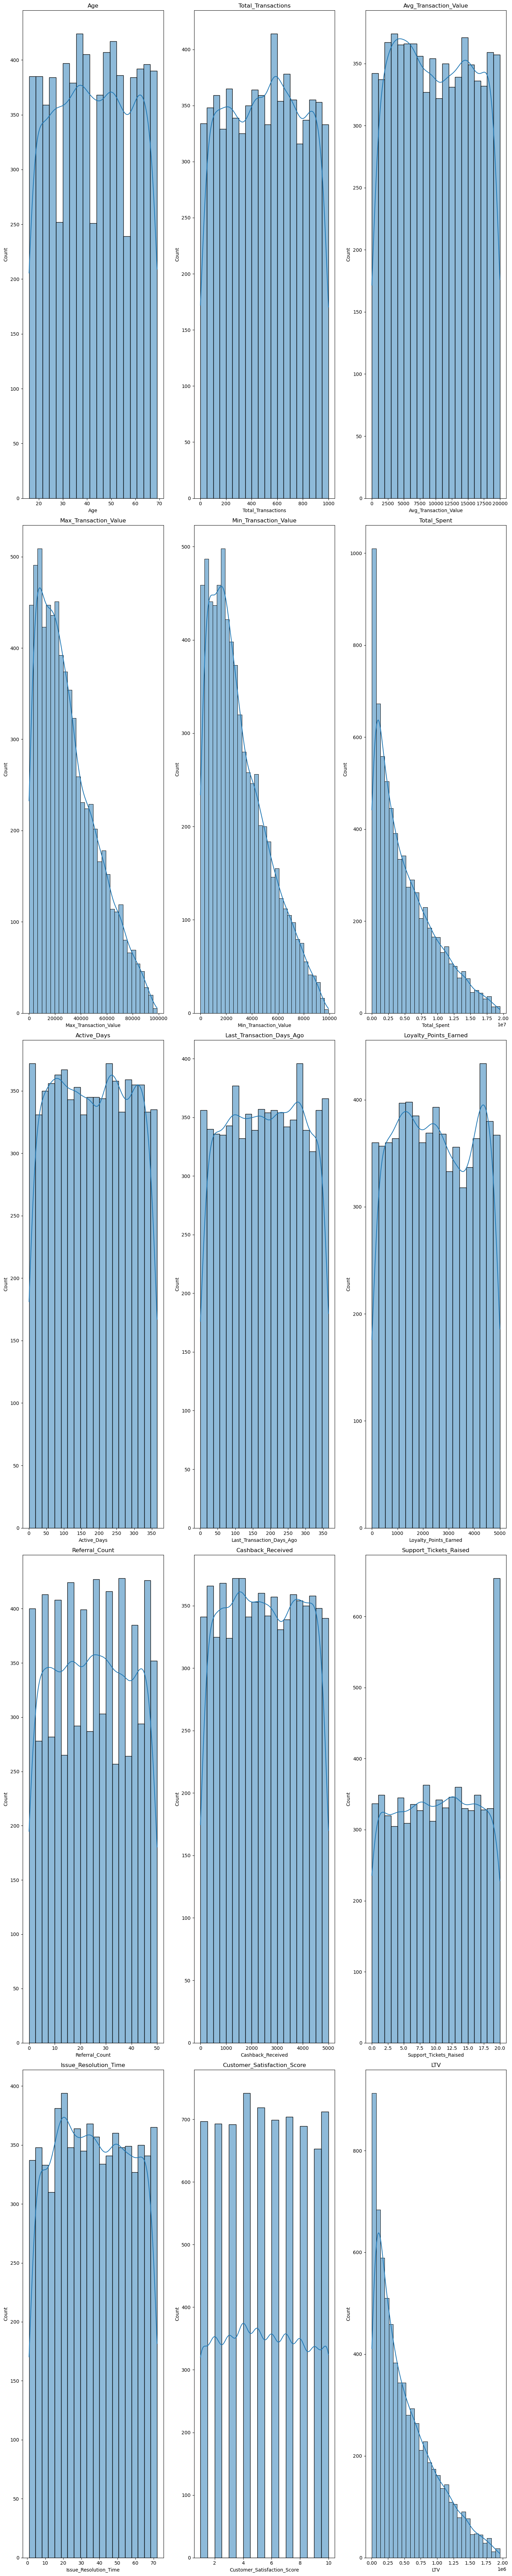

In [8]:




numerical_features = features.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(15, 5*len(numerical_features)))

for i, col in enumerate(numerical_features):
    plt.subplot((len(numerical_features)+2)//3, 3, i+1)  
    sns.histplot(data=df, x=col, kde=True)  
    plt.title(col)

plt.tight_layout()
plt.show()


In [9]:


categorical_features = features.select_dtypes(exclude=['number']).columns.tolist()

for col in categorical_features:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print("\n")


--- Location ---
Location
Urban       2368
Suburban    2320
Rural       2312
Name: count, dtype: int64


--- Income_Level ---
Income_Level
Middle    2391
Low       2311
High      2298
Name: count, dtype: int64


--- App_Usage_Frequency ---
App_Usage_Frequency
Daily      2346
Monthly    2329
Weekly     2325
Name: count, dtype: int64


--- Preferred_Payment_Method ---
Preferred_Payment_Method
UPI               1791
Debit Card        1761
Wallet Balance    1736
Credit Card       1712
Name: count, dtype: int64




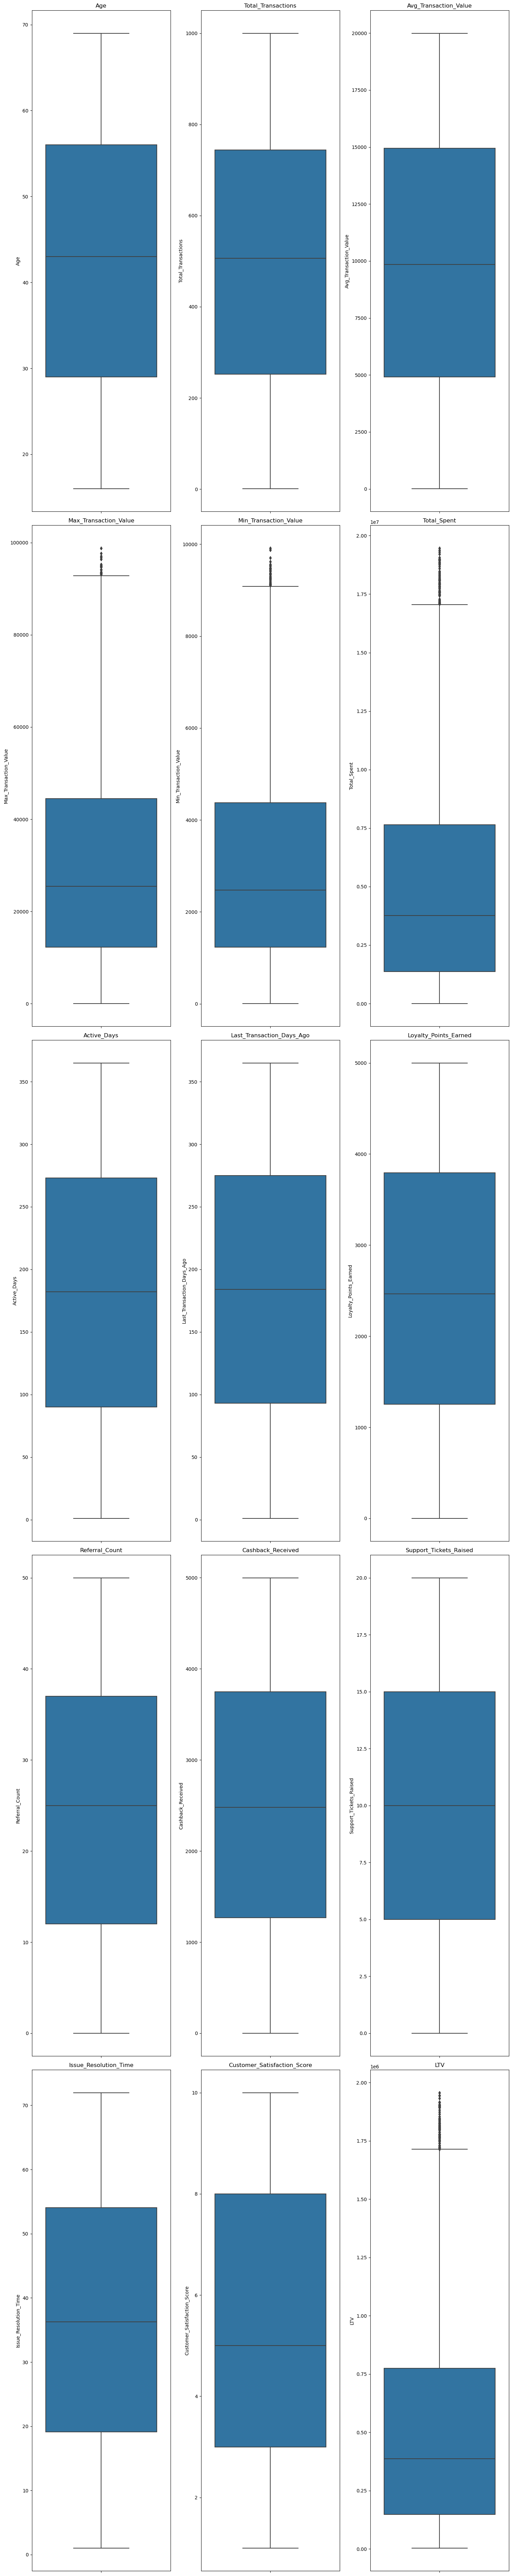

In [10]:





numerical_features = features.select_dtypes(include=['number']).columns.tolist()


plt.figure(figsize=(15, 5*len(numerical_features)))

for i, col in enumerate(numerical_features):
    plt.subplot((len(numerical_features)+2)//3, 3, i+1)  
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [11]:
X = df[features.columns]  
y = df[label.columns[0]]  


# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
numerical_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = X.select_dtypes(exclude=['number']).columns.tolist()

income_col = ['Income_Level']
other_categorical = [col for col in categorical_features if col not in income_col]


numerical_transformer = Pipeline(steps=[
    ('yeojohnson', PowerTransformer(method='yeo-johnson')),
    ('scaler', StandardScaler())
])


ordinal_transformer = OrdinalEncoder()


onehot_transformer = OneHotEncoder(handle_unknown='ignore')


preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('income', ordinal_transformer, income_col),
    ('cat', onehot_transformer, other_categorical)
])


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=100,
        learning_rate=0.05,
        max_depth=6,
        random_state=42,
        verbosity=1
    ))
])


In [13]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('yeojohnson',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Total_Transactions',
                                                   'Avg_Transaction_Value',
                                                   'Max_Transaction_Value',
                                                   'Min_Transaction_Value',
                                                   'Total_Spent', 'Active_Days',
                                                   'Last_Transaction_Days_Ago',
                                                   'Loyalty_Points_Earned',
                                                   'Referral_Count',
                                                   'C...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Predict on train and test
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Train metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Test metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("=== Train Set Metrics ===")
print(f"MSE: {train_mse:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"R²: {train_r2:.4f}\n")

print("=== Test Set Metrics ===")
print(f"MSE: {test_mse:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²: {test_r2:.4f}")


=== Train Set Metrics ===
MSE: 13550470.1883
RMSE: 3681.0963
R²: 0.9999

=== Test Set Metrics ===
MSE: 18106451.4421
RMSE: 4255.1676
R²: 0.9999


In [15]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Define RMSE scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)  

kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='r2')
print("R² scores for each fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

rmse_scores = cross_val_score(pipeline, X, y, cv=kf, scoring=rmse_scorer)
rmse_scores = -rmse_scores  
print("RMSE for each fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))


R² scores for each fold: [0.99990701 0.99991371 0.99986642 0.99990365 0.99990572]
Mean R²: 0.9998993021349414
RMSE for each fold: [4255.16761622 4169.24811149 4981.29478584 4309.11423137 4216.56313011]
Mean RMSE: 4386.27757500583
